In [1]:
from sklearn.externals import joblib
import pandas as pd


In [2]:
test_indices = pd.read_csv('./test_indices.csv')

In [3]:
test_indices.head()

,Unnamed: 0,0
0,0,18191
1,1,18061
2,2,13208
3,3,19382
4,4,16321


In [4]:
test_indices = test_indices.drop(['Unnamed: 0'], axis=1)

In [5]:
test_indices = test_indices.values

In [6]:
X_test = pd.read_csv('X_test.csv',na_filter=False)  #可以着增加一点read_csv的速度。

In [7]:
X_test = X_test.drop(columns=['Unnamed: 0'])


In [8]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.071002,0.045461,0.000276,-0.006126,-0.049513,0.009203,0.031776,-0.008720,-0.005790,-0.022079,...,-0.009933,0.005058,-0.001651,-0.003149,0.017901,0.015936,-0.016922,0.005886,0.012429,-0.000635
1,0.101041,0.068582,-0.011766,-0.038215,-0.147794,0.058488,0.175558,0.157145,0.203340,-0.077071,...,-0.005387,0.007740,-0.006082,0.007796,0.008066,0.003034,0.003968,0.012134,0.000111,0.004399
2,0.022944,0.088701,-0.016559,0.011640,0.026533,-0.006289,-0.022222,0.005504,0.007996,0.007461,...,-0.011219,0.015276,0.009090,0.009730,-0.011595,-0.013702,-0.003322,0.010580,-0.009004,-0.003159
3,0.030025,0.112281,-0.011116,0.015315,0.014435,-0.002004,-0.004568,0.010702,0.010346,-0.006501,...,-0.000118,-0.014450,-0.002628,0.002942,0.005644,0.014637,-0.007001,-0.000303,-0.010057,-0.021584
4,0.100165,0.069588,0.041176,0.015997,-0.072685,0.033633,0.088391,0.009019,0.002836,-0.036571,...,0.000914,-0.032347,0.000779,0.013231,0.011138,-0.004355,0.007592,0.016648,-0.011326,0.006556


In [9]:
X_test = X_test.values

In [10]:
df = pd.read_csv('concated_dataset.csv')

In [11]:
df.head()

,Unnamed: 0,content,label
0,66242,新华社 照片 外代 2017 年 5 月 18 日 n 外代 二线 美国国会 大厦 n5 月...,1
1,43659,新华社 照片 亚眠 法国 2017 年 4 月 28 日 n 国际 图文 互动 1 小 工厂...,1
2,48896,新华社 照片 外代 2017 年 5 月 3 日 n 外代 二线 钢管 上 的 风情 n5 ...,1
3,66671,新华社 微 特稿 韩国 国土 交通部 １ ８ 日 说 政府 拟 出台 一系列 措施 规范 民...,1
4,46499,新华社 北京 4 月 30 日电 4 月 30 日 全国 大部分 地区 天气晴好 群众 出游...,1


In [12]:
df.index = df['Unnamed: 0'].values


In [13]:
df.head()

,Unnamed: 0,content,label
66242,66242,新华社 照片 外代 2017 年 5 月 18 日 n 外代 二线 美国国会 大厦 n5 月...,1
43659,43659,新华社 照片 亚眠 法国 2017 年 4 月 28 日 n 国际 图文 互动 1 小 工厂...,1
48896,48896,新华社 照片 外代 2017 年 5 月 3 日 n 外代 二线 钢管 上 的 风情 n5 ...,1
66671,66671,新华社 微 特稿 韩国 国土 交通部 １ ８ 日 说 政府 拟 出台 一系列 措施 规范 民...,1
46499,46499,新华社 北京 4 月 30 日电 4 月 30 日 全国 大部分 地区 天气晴好 群众 出游...,1


In [14]:
df = df.drop(df.columns[0],axis =1)

In [15]:
df.head()

,content,label
66242,新华社 照片 外代 2017 年 5 月 18 日 n 外代 二线 美国国会 大厦 n5 月...,1
43659,新华社 照片 亚眠 法国 2017 年 4 月 28 日 n 国际 图文 互动 1 小 工厂...,1
48896,新华社 照片 外代 2017 年 5 月 3 日 n 外代 二线 钢管 上 的 风情 n5 ...,1
66671,新华社 微 特稿 韩国 国土 交通部 １ ８ 日 说 政府 拟 出台 一系列 措施 规范 民...,1
46499,新华社 北京 4 月 30 日电 4 月 30 日 全国 大部分 地区 天气晴好 群众 出游...,1


In [16]:
model_LogisticRegression = joblib.load('model_LogisticRegression.pkl')    

In [17]:
while True:
    input_content = input("Please input a text's index(0-{}), i will judge whether the text is released from '新华社' or '新华网' or not, "
                          "\nenter 'exit' to end the programe:".format(len(X_test)))
    if input_content == 'exit':
        break

    elif ((input_content.isdigit() == False) or (int(input_content) >= len(X_test))) and (input_content != 'exit'):
        print('Please input integer between 0-{}'.format(len(X_test)))
        print('\n')

    else:
        input_content = int(input_content)
        print('The text you choosed is:')
        num = test_indices[input_content][0]
        print(num)
        print(df['content'].iloc[num])
        res = int(model_LogisticRegression.predict(X_test[[input_content]]))

        if res == 1:
            print("Predict answer: the text you choosed was released by '新华社' or '新华网'")
            print("The ture label is {}".format(df['label'].iloc[num]))
            print('\n')
            
        elif res == 0:
            print("Predict answer: the text you choosed was released by other organization")
            print("The ture label is {}".format(df['label'].iloc[num]))
            print('\n')

Please input a text's index(0-1000), i will judge whether the text is released from '新华社' or '新华网' or not, 
enter 'exit' to end the programe:324
The text you choosed is:
16137
nan
Predict answer: the text you choosed was released by other organization
The ture label is 0


Please input a text's index(0-1000), i will judge whether the text is released from '新华社' or '新华网' or not, 
enter 'exit' to end the programe:43
The text you choosed is:
283
新华社 上海 ４ 月 １ ２ 日电 记者 黄安 琪 上海 知识产权 法院 于 １ ２ 日 发布 ２ ０ １ ５ ２ ０ １ ６ 专利 案件 白皮书 白皮书 显示 ２ ０ １ ５ 至 ２ ０ １ ６ 年 专利 案件 收案 数 年均 增长 超 ２ ０ 涉外 案件 占 比 为 １ ５ 展会 成为 权利 人 维权 的 热点 n ２ ０ １ ５ 至 ２ ０ １ ６ 年 上海 知产 法院 共 受理 专利 案件 １ ０ １ １ 件 并 保持 年均 ２ ０ 以上 的 增幅 其中 受理 涉外 专利 案件 １ ５ ２ 件 占 收案 总量 的 １ ５ 案件 当事人 涉及 美国 日本 瑞典 德国 等 １ ４ 个 国家 包括 三菱 电机 株式会社 巴斯夫 公司 惠普 发展 公司 等 国际 知名企业 n 据 办案 法官 分析 涉外 专利 案件 呈现 两个 特点 一是 发明专利 案件 较 多 侵害 发明 专利权 案件 共计 ９ ４ 件 占 涉外 案件 总量 的 ６ １ ８ 发明专利 类型 涵盖 纺织 包装 医疗 机床 汽车 等 技术 领域 二是 原告 主要 是 各个 技术 领域 的 知名 跨国企业 或 行业 领先者 涉诉 国内 当事人 多为 中型企业 n 此外 白皮书 显示 展会 成为 权利 人 维权 的 热点 目前 

In [18]:
y_pred = model_LogisticRegression.predict(X_test)

In [19]:
candidate_news = []
for index, (y_hat,y) in enumerate(zip(y_pred,df['label'].values[test_indices])):
    if y_hat == 1 and y == 0:
        candidate_news.append(index)

In [20]:
candidate_news

[498]

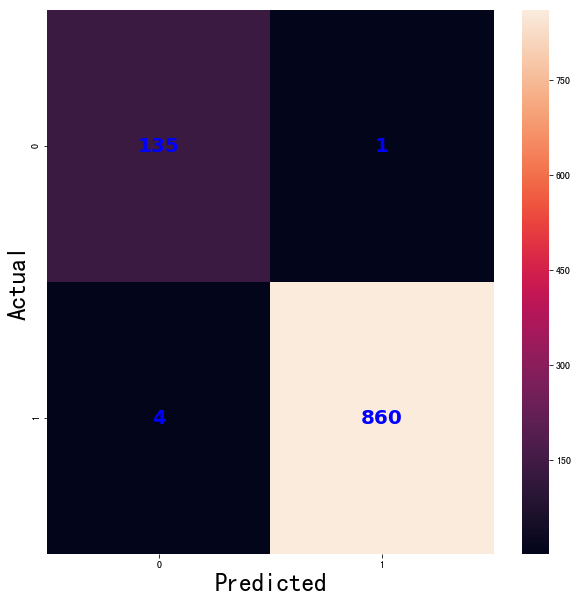

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

conf_mat = confusion_matrix(df['label'].values[test_indices],y_pred, labels = [0,1])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True,annot_kws={'size':20,'weight':'bold', 'color':'blue'}, fmt='d',
           xticklabels=set(df.label.values), yticklabels=set(df.label.values))
plt.ylabel('Actual', fontsize = 25)
plt.xlabel('Predicted',fontsize = 25)
plt.show()

#热力图官方文档：http://seaborn.pydata.org/generated/seaborn.heatmap.html，
#中文较为详细的https://blog.csdn.net/m0_38103546/article/details/79935671

In [22]:
from sklearn import metrics
print(metrics.classification_report(df['label'].values[test_indices], y_pred,labels=[0,1]))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       136
          1       1.00      1.00      1.00       864

avg / total       1.00      0.99      1.00      1000



In [23]:
candidate_news

[498]

In [24]:
from scipy.spatial.distance import cosine

In [25]:
def cosine_distance(list1, list2):
    return cosine(list1, list2)

In [26]:
cosine_distance([1,1], [2,1])

0.05131670194948623

In [27]:
#在所有的测试集文本中，逐一和candidate_news中的元素计算余弦值，并排序，分别取最小的五个文本。
sorted_res = []
for i in range(len(candidate_news)):
    sorted_res.append(sorted(list(range(len(test_indices))), key = lambda x:cosine_distance(
                               list(X_test[x]), list(X_test[candidate_news[i]])))[1:5])

/home/chenshixin/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:644: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [28]:
sorted_res

[[305, 26, 302, 261]]

In [29]:
cosine_res = []
for i in range(len(candidate_news)):
    cosine_res.append(cosine_distance(
        list(X_test[candidate_news[i]]),list(X_test[sorted_res[i][0]])
    ))

In [30]:
sorted_cosine_res = sorted(cosine_res)

In [31]:
sorted_cosine_res  #最小的余弦值依然比较大。

[0.8501389170592532]

In [32]:
#获得最小余弦值的candidate_res也即sorted_res的下标。得到余弦值最小的一对。
for index, cosine_value in enumerate(cosine_res):
    if cosine_value == sorted_cosine_res[0]:
        a=index

In [33]:
print(candidate_news[a],sorted_res[a],sorted_cosine_res[a])

498 [305, 26, 302, 261] 0.8501389170592532


In [34]:
cosine_distance(list(X_test[candidate_news[a]]),list(X_test[sorted_res[a][0]]))

0.8501389170592532

In [35]:
print(candidate_news[a],sorted_res[a][0])

498 305


In [36]:
df['content'].values[candidate_news[a]]

'新华社 照片 南京 2017 年 4 月 11 日 n 体育 5 足球 亚冠 小组赛 江苏 苏宁 战胜 大阪 钢巴 n4 月 11 日 江苏 苏宁 队 门将 张思鹏 上 在 比赛 中 扑救 n 当日 在 江苏 南京 举行 的 2017 赛季 亚冠 联赛 H 组 第四轮 比赛 中 中国 江苏 苏宁 队 主场 以 3 比 0 战胜 日本 大阪 钢巴队 以 小组赛 四 战全胜 的 成绩 提前 两轮 进入 淘汰赛 n 新华社 记者 杨磊 摄'

In [37]:
df['content'].values[sorted_res[a][0]]

'n 诺贝尔文学奖 得主 帕特里克 莫迪 亚诺 勒 克莱 齐奥 大江健三郎 美国 著名作家 安妮 普鲁科伦 麦凯恩 德国 著名作家 马丁 瓦尔泽 英国 著名作家 朱利安 巴恩斯 这些 当代 知名 的 外国 小说家 有 一个 共同 特点 获得 过 中国 的 21 世纪 年度 最佳 外国 小说 奖 n 中国 标准 世界 眼光 由 人民文学出版社 与 中国 外国文学 学会 在 2001 年 共同 发起 的 这 一 奖项 截至 2016 年 已 成功 举办 了 15 届 共有 24 个 国家 的 92 位 作家 的 作品 获奖 挖掘 出版 了 不少 当代 外国文学 名家 大家 的 作品 n 日前 2016 年 21 世纪 年度 最佳 外国 小说 奖在京 揭晓 德国 作家 海因茨 海勒 的 本来 我们 应该 跳舞 西班牙 作家 费尔南多 马 里亚斯 的 父亲 岛 尼日利亚 作家 A 伊各尼 巴雷特 的 黑 腚 冰岛 作家 埃纳 尔茂尔古 德蒙 德松 的 酷暑 天 以及 俄罗斯 作家 古泽 尔雅 辛娜 的 祖 列伊 哈 睁开 了 眼睛 获奖 这些 作品 已 被 译成 中文 并 陆续 出版 小 编带 你 先睹为快 n 本来 我们 应该 跳舞 你 没读 过 的 末世 文 nnn 海因茨 海勒 德国 当代作家 出 生于 慕尼黑 曾 在 慕尼黑 纽约 和 瑞士 的 比尔 攻读 哲学 与 文学 其 小说 处女作 让 人 心安 的 煤油 爆炸声 2014 年 一经 出版 即 引来 好评 如潮 本来 我们 应该 跳舞 是 作者 第二部 小说 这部 作品 同样 受到 媒体 诸多 赞誉 入选 2015 年 德国 图书奖 长 名单 n 内容简介 n 五个 三十多岁 的 男子 循着 多年 的 习惯 暂时 离开 自己 熟悉 的 生活 离开 家庭 和 工作 去 山里 的 小屋 共度 周末 但 周末 结束 后 他们 突然 发现自己 无法 回到 那个 熟悉 的 世界 中 去 离开 小屋 的 他们 看到 的 是 一个 被 彻底 摧毁 的 世界 废墟 焦土 尸体 被 劫掠一空 的 超市 没有 一丝 生命 痕迹 的 村庄 站 在 被 摧毁 的 现代文明 之上 人 仿佛 突然 被 打 回前 文明 时代 面临 着 赤裸裸 的 生存 问题 他们 能够 依靠 的 除了 彼此 就 只 剩 自己 n 推介 语 n 本来 我们

### 果然即使是余弦值最小的两个文本，看起来也不是很相似

In [38]:
original_news_1 = df['content'].values[candidate_news[a]].replace(' ', '') 
original_news_2 = df['content'].values[sorted_res[a][0]].replace(' ', '')[:200]
#orginal_news_2太长了，再计算edit_distance时超过了计算次数的限制，所以只取文本的前200个字符。

### Edit Distance

In [39]:
from functools import lru_cache

@lru_cache(maxsize=2**12)
def edit_distance(string1,string2):
    if len(string1) == 0: return(len(string2))
    if len(string2) == 0: return (len(string1))
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    min_edit_distance=min([
        
        edit_distance(string1[:-1], string2) + 1,      #situation 1, string1 del tail
        edit_distance(string1, string2[:-1]) + 1,      #situation 2, string1 add the tailof string2
        edit_distance(string1[:-1], string2[:-1]) + (0 if tail_s1 ==  tail_s2 else 2)    #situation 3
         
    ])
    
    return min_edit_distance

edit_distance("我今天确实不太想吃饭", "我今天真的不太像吃饭")

6

In [40]:
edit_distance(original_news_1,original_news_2)  #果然很大！

311

In [41]:
#Solution Parse to Edit-Distance, copied from wangshilin.
@lru_cache(maxsize=2**10)
def edit_distance_with_path(str1, str2):
    
    if not len(str1):return [len(str2), ' ']
    
    if not len(str2):return [len(str1), ' ']
    
    tail1 = str1[-1]
    tail2 = str2[-1]
     
    _del = edit_distance_with_path(str1[:-1], str2)
    _add = edit_distance_with_path(str1, str2[:-1])
    _sub = edit_distance_with_path(str1[:-1], str2[:-1])
    op_desc = {
        "del":" Del {}".format(tail1),
        "add":" Add {}".format(tail2),
        "sub0":"",
        "sub2":" Sub {}=>{}".format(tail1, tail2)
    }
    # [distance, operator]
    operator = [
        [_del[0] + 1, _del[1] + op_desc["del"]],
        [_add[0] + 1, _add[1] + op_desc["add"]],  
        [_sub[0] + (0 if tail1 == tail2 else 2), _sub[1] + op_desc["sub" + ('0' if tail1 == tail2 else '2')]],
    ]
    min_op =  min(operator, key=lambda x : x[0])
    return min_op

In [42]:
edit_distance_with_path("我今天确实不太想吃饭", "我今天真的不太像吃饭")

[6, '  Add 真 Add 的 Del 确 Del 实 Add 像 Del 想']

In [43]:
edit_distance_with_path(original_news_1,original_news_2)

[311,
 '  Del 新 Del 华 Del 社 Del 照 Del 片 Del 南 Del 京 Del 0 Add 世 Add 纪 Del 7 Add 度 Add 最 Add 佳 Add 外 Add 国 Del 4 Del 月 Del 1 Del 1 Del 日 Del n Del 体 Del 育 Del 5 Del 足 Del 球 Del 亚 Del 冠 Add 说 Add 奖 Del 组 Del 赛 Del 江 Del 苏 Del 苏 Del 宁 Del 战 Del 胜 Del 大 Del 阪 Del 钢 Del 巴 Del 4 Del 月 Del 1 Del 1 Del 日 Del 江 Del 苏 Del 苏 Del 宁 Del 队 Del 门 Del 将 Del 张 Del 思 Del 鹏 Del 上 Del 在 Del 比 Del 赛 Add 国 Add 标 Add 准 Add 世 Add 界 Add 眼 Add 光 Add 由 Add 人 Add 民 Add 文 Add 学 Add 出 Add 版 Add 社 Add 与 Add 中 Add 国 Add 外 Add 国 Add 文 Add 学 Add 学 Add 会 Del 扑 Del 救 Del n Del 当 Del 日 Add 2 Add 0 Add 0 Add 1 Add 年 Add 共 Add 同 Add 发 Add 起 Del 江 Del 苏 Del 南 Del 京 Del 举 Del 行 Add 这 Add 一 Add 奖 Add 项 Add 截 Add 至 Add 6 Add 年 Add 已 Add 成 Add 功 Add 举 Add 办 Add 了 Add 1 Add 5 Add 届 Add 共 Add 有 Add 2 Add 4 Add 个 Del 7 Del 赛 Del 季 Del 亚 Del 冠 Del 联 Del 赛 Del H Del 组 Del 第 Del 四 Del 轮 Del 比 Del 赛 Del 中 Del 中 Add 家 Add 的 Add 9 Add 2 Add 位 Add 作 Add 家 Add 的 Add 作 Add 品 Add 获 Add 奖 Add 挖 Add 掘 Add 出 Add 版 Add 了 Add 不 Add 少 Add 当 Add 代 